In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [109]:
dataset=pd.read_csv('bank.csv')

In [110]:
dataset.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [114]:
le = LabelEncoder()
dataset['job']=le.fit_transform(dataset['job'])
dataset['marital']=le.fit_transform(dataset['marital'])
dataset['education']=le.fit_transform(dataset['education'])
dataset['default']=le.fit_transform(dataset['default'])
dataset['housing']=le.fit_transform(dataset['housing'])
dataset['loan']=le.fit_transform(dataset['loan'])
dataset['contact']=le.fit_transform(dataset['contact'])
dataset['month']=le.fit_transform(dataset['month'])
dataset['poutcome']=le.fit_transform(dataset['poutcome'])
dataset['deposit']=le.fit_transform(dataset['deposit'])
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


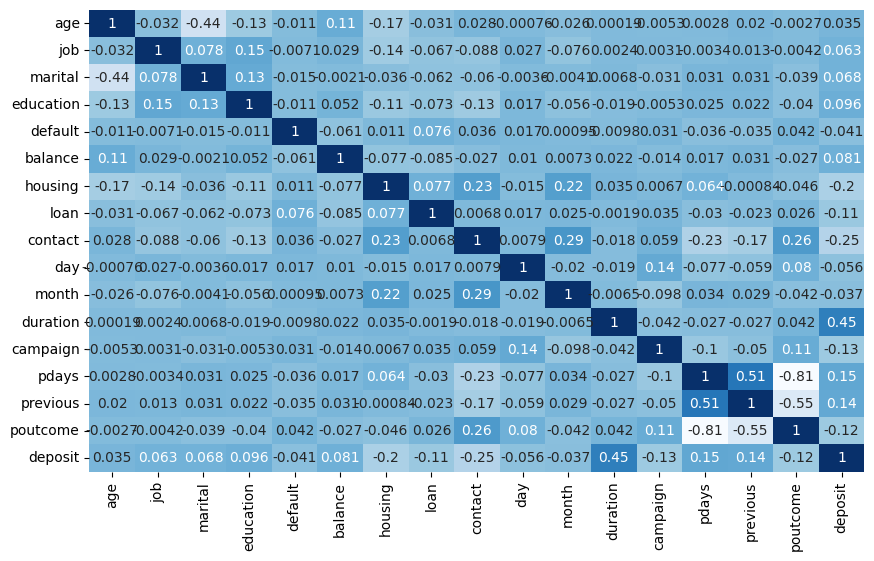

In [115]:
corr=dataset.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cbar=False,cmap='Blues')
plt.show()

## Droping Irrelevent Feature

In [108]:
#dataset.drop(['trestbps','chol','fbs','restecg'],axis=1,inplace=True)

## Defining Dependent and independent Variable

In [116]:
x=dataset.drop('deposit',axis=1)
y=dataset['deposit']

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled = pd.DataFrame(X_scaled, columns = x.columns)
X_scaled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.491505,-1.391604,-0.318672,-0.380501,-0.123617,0.252525,1.055280,-0.387923,1.844786,-1.265746,0.800268,1.930226,-0.554168,-0.481184,-0.363260,0.520705
1,1.239676,-1.391604,-0.318672,-0.380501,-0.123617,-0.459974,-0.947616,-0.387923,1.844786,-1.265746,0.800268,3.154612,-0.554168,-0.481184,-0.363260,0.520705
2,-0.019470,1.399105,-0.318672,-0.380501,-0.123617,-0.080160,1.055280,-0.387923,1.844786,-1.265746,0.800268,2.929901,-0.554168,-0.481184,-0.363260,0.520705
3,1.155733,0.778947,-0.318672,-0.380501,-0.123617,0.293762,1.055280,-0.387923,1.844786,-1.265746,0.800268,0.596366,-0.554168,-0.481184,-0.363260,0.520705
4,1.071790,-1.391604,-0.318672,0.953822,-0.123617,-0.416876,-0.947616,-0.387923,1.844786,-1.265746,0.800268,0.867171,-0.186785,-0.481184,-0.363260,0.520705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-1.081525,1.279987,-1.714823,-0.123617,-0.473616,1.055280,-0.387923,-0.598149,0.515650,-1.706158,-0.331287,-0.554168,-0.481184,-0.363260,0.520705
11158,-0.187357,0.778947,-0.318672,-0.380501,-0.123617,-0.246658,-0.947616,-0.387923,1.844786,0.040612,0.173661,-0.832564,0.547981,-0.481184,-0.363260,0.520705
11159,-0.774958,1.399105,1.279987,-0.380501,-0.123617,-0.464934,-0.947616,-0.387923,-0.598149,0.396891,-1.392855,-0.622258,-0.186785,-0.481184,-0.363260,0.520705
11160,0.148416,1.399105,-0.318672,-0.380501,-0.123617,-0.473926,-0.947616,2.577830,-0.598149,-0.909466,0.800268,-1.045752,-0.186785,1.109571,1.818332,-2.470600


In [134]:
X_train_scaled,X_test_scaled, y_train_scaled, y_test_scaled=train_test_split(x,y,test_size=0.2,random_state=42)

## Training Random Forest Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
model=RandomForestClassifier(n_estimators=100, oob_score=True,bootstrap=True,)
model.fit(X_train_scaled,y_train_scaled)

RandomForestClassifier(oob_score=True)

In [138]:
model.score(X_test,y_test)

0.8347514554411106

## Calculating Out of bag score and error

In [139]:
print("OOB Score:", model.oob_score_)
print("OOB Error:", 1 - model.oob_score_)

OOB Score: 0.8484712733788778
OOB Error: 0.15152872662112216


## Hyperparameter Tuning Using Grid Search CV

In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
clf=GridSearchCV(RandomForestClassifier(),{'n_estimators':[10,50,200,100],'max_depth':[3,5,10,None]},cv=5,error_score='raise',return_train_score=True)

In [142]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise', estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [10, 50, 200, 100]},
             return_train_score=True)

In [147]:
clf.best_score_

np.float64(0.8505988375193303)

In [148]:
clf.best_params_

{'max_depth': None, 'n_estimators': 200}

In [154]:
df=pd.DataFrame(clf.cv_results_)
df[['mean_test_score','param_max_depth','param_n_estimators']]

,mean_test_score,param_max_depth,param_n_estimators
0,0.790795,3,10
1,0.798634,3,50
2,0.799306,3,200
3,0.797849,3,100
4,0.817672,5,10
5,0.815881,5,50
6,0.817449,5,200
7,0.816777,5,100
8,0.839287,10,10
9,0.844104,10,50


## Calculating and ploting n_estimater and OOB_errors

In [164]:
n_estimators_range = [10, 50, 100,200]
oob_errors = []
for n in n_estimators_range:
    rf = RandomForestClassifier(
        n_estimators=n,
        oob_score=True,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train_scaled, y_train_scaled)
    oob_errors.append(1 - rf.oob_score_)

C:\Users\sk021\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


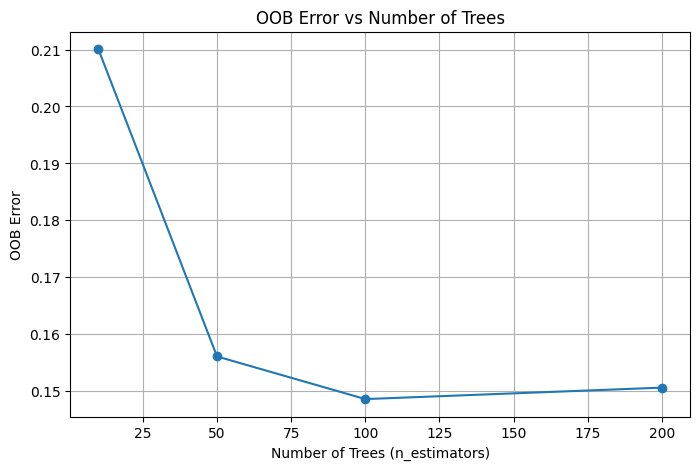

In [165]:
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, oob_errors, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('OOB Error')
plt.title('OOB Error vs Number of Trees')
plt.grid(True)
plt.show()

## Training Randomforest based on Best parameter obtained using GridSearchCV

In [166]:
best_model=RandomForestClassifier(n_estimators=200,max_depth=None)

In [167]:
best_model.fit(X_train_scaled,y_train_scaled)

RandomForestClassifier(n_estimators=200)

In [168]:
best_model.score(X_test_scaled,y_test_scaled)

0.8365427675772503

## Ploting Feature Importance

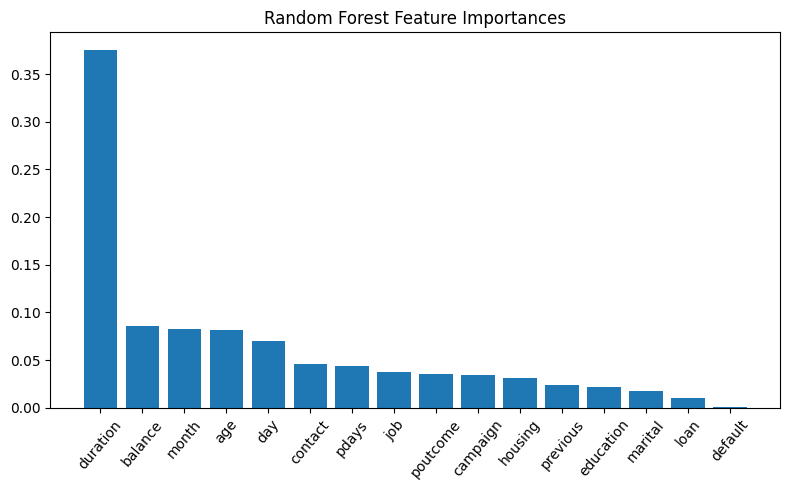

In [169]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), dataset.columns[indices], rotation=50)
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

## Comparing with single Decision Tree

In [170]:
from sklearn.tree import DecisionTreeClassifier

In [172]:
DT=DecisionTreeClassifier()
DT.fit(X_train_scaled,y_train_scaled)
DT.score(X_test_scaled,y_test_scaled)

0.7630989699955217

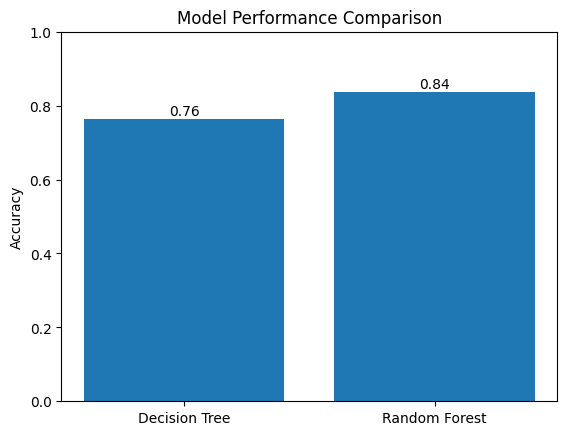

In [187]:
DT_score=DT.score(X_test,y_test)
RF_score=best_model.score(X_test,y_test)
score=[DT_score,RF_score]
model=['Decision Tree','Random Forest']
plt.bar(model,score)
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
for i, v in enumerate(score):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.ylim(0, 1)
plt.show()

## Saving the Model

In [188]:
import pickle
with open('random_forest.pkl','wb') as file:
    pickle.dump(best_model,file)